Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Departamento Nacimiento   424 non-null    object 
 1   Municipio Nacimiento      424 non-null    object 
 2   Area Nacimiento           424 non-null    object 
 3   Cód. IPS                  424 non-null    float64
 4   IPS                       424 non-null    object 
 5   Sexo                      424 non-null    object 
 6   Peso                      424 non-null    int64  
 7   Talla                     424 non-null    int64  
 8   Fecha Nacimiento          424 non-null    object 
 9   Hora Nacimiento           424 non-null    object 
 10  Parto Atendido Por        424 non-null    object 
 11  Tiempo Gestación          424 non-null    int64  
 12  Tipo Parto                424 non-null    object 
 13  Grupo Sanguineo           421 non-null   

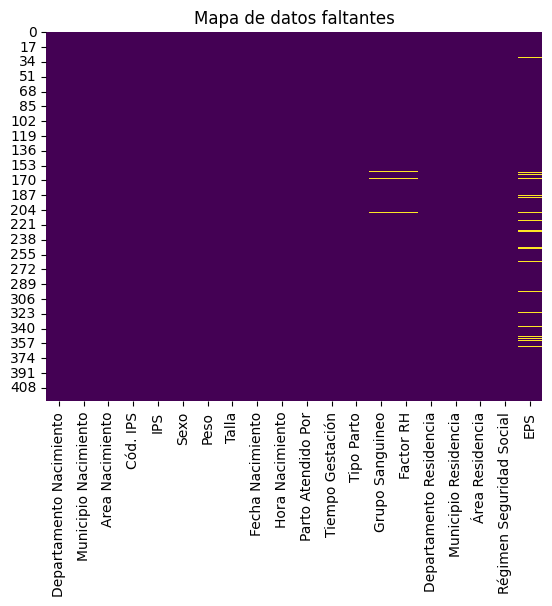

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Nacimientos_en_el_Municipio_de_Charal__20250805.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("\nPrimeras filas del dataset")
print(df.head())
print("\nResumen estadístico del dataset")
print(df.describe())

# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


Número de filas después de eliminar datos faltantes: 400

Datos faltantes por columna después de la limpieza:
Departamento Nacimiento     0
Municipio Nacimiento        0
Area Nacimiento             0
Cód. IPS                    0
IPS                         0
Sexo                        0
Peso                        0
Talla                       0
Fecha Nacimiento            0
Hora Nacimiento             0
Parto Atendido Por          0
Tiempo Gestación            0
Tipo Parto                  0
Grupo Sanguineo             0
Factor RH                   0
Departamento Residencia     0
Municipio Residencia        0
Área Residencia             0
Régimen Seguridad Social    0
EPS                         0
dtype: int64


/tmp/ipython-input-1209801244.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


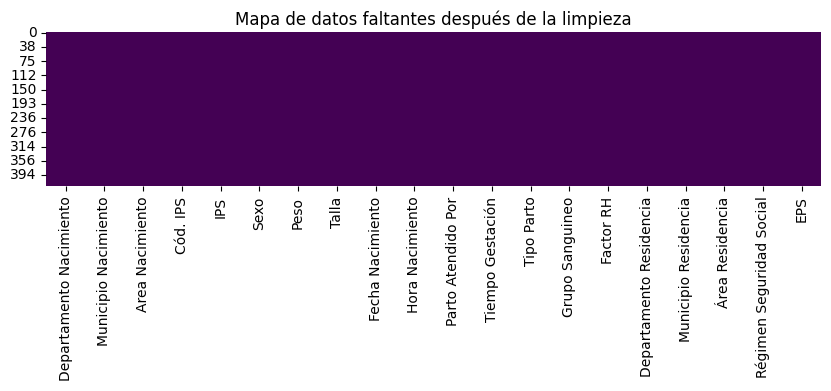

In [ ]:
# 3. Eliminar filas con datos faltantes y verificar limpieza

# Eliminar filas con datos faltantes
df_filtrado = df.dropna()

# Mostrar el número de filas después de la limpieza
print(f"\nNúmero de filas después de eliminar datos faltantes: {df_filtrado.shape[0]}")

# Identificar y mostrar el número de datos faltantes por columna
faltantes = df_filtrado.isnull().sum()
print("\nDatos faltantes por columna después de la limpieza:")
print(faltantes)

# Visualizar el mapa de calor de datos faltantes (debería estar vacío si la limpieza fue exitosa)
plt.figure(figsize=(10, 2))
sns.heatmap(df_filtrado.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes después de la limpieza")
plt.tight_layout()
# plt.savefig("mapa_datos_faltantes.png") # Quitar comentario si se quiere guardar la figura
plt.show()

In [ ]:
df_columnas=["Departamento Nacimiento","Municipio Nacimiento","Sexo","Peso","Talla","Tiempo Gestación"]
print(df_filtrado[df_columnas].columns)
print("\nINFORMACION DEL SUNSET DEL DATASET")
print(df_filtrado[df_columnas].info)
print("\nPRIMERAS FILAS DEL DATASET")
print(df_filtrado[df_columnas].head())

Index(['Departamento Nacimiento', 'Municipio Nacimiento', 'Sexo', 'Peso',
       'Talla', 'Tiempo Gestación'],
      dtype='object')

INFORMACION DEL SUNSET DEL DATASET
<bound method DataFrame.info of     Departamento Nacimiento Municipio Nacimiento       Sexo  Peso  Talla  \
0                 SANTANDER              SAN GIL  MASCULINO  3050     52   
1                 SANTANDER              SAN GIL   FEMENINO  3465     53   
2                 SANTANDER              SAN GIL  MASCULINO  3280     51   
3                 SANTANDER              SAN GIL  MASCULINO  3430     53   
4                 SANTANDER              SAN GIL  MASCULINO  2860     52   
..                      ...                  ...        ...   ...    ...   
419               SANTANDER              SOCORRO   FEMENINO  2345     45   
420               SANTANDER          BUCARAMANGA  MASCULINO   800     32   
421               SANTANDER          BUCARAMANGA   FEMENINO  2510     47   
422               SANTANDER          BU

Generando gráficos para la columna: Departamento Nacimiento


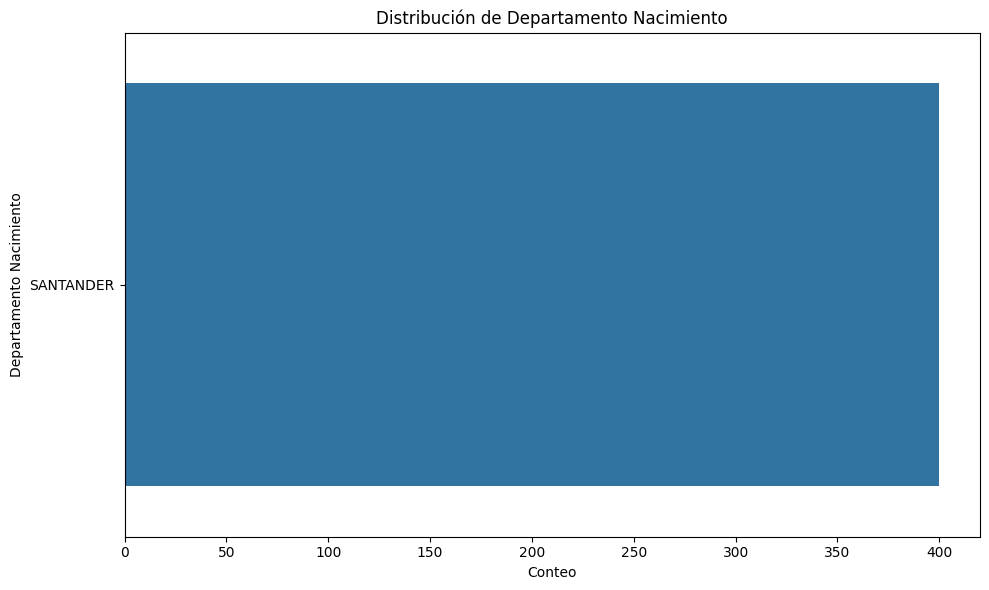

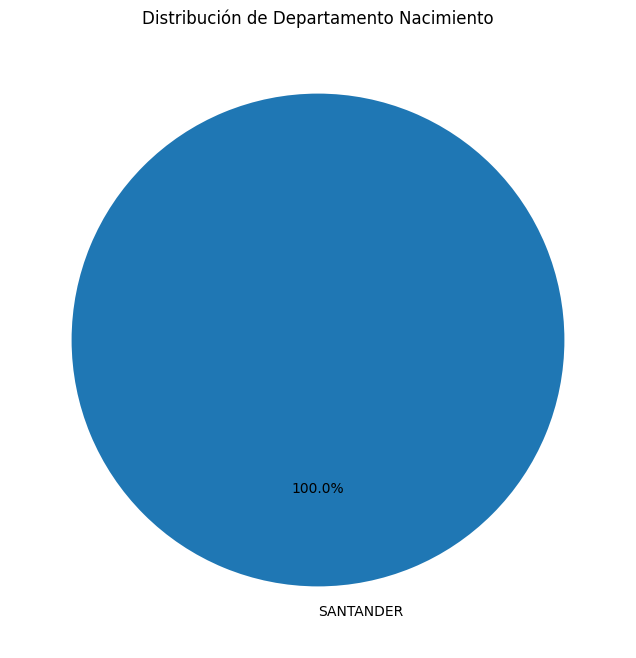

Generando gráficos para la columna: Municipio Nacimiento


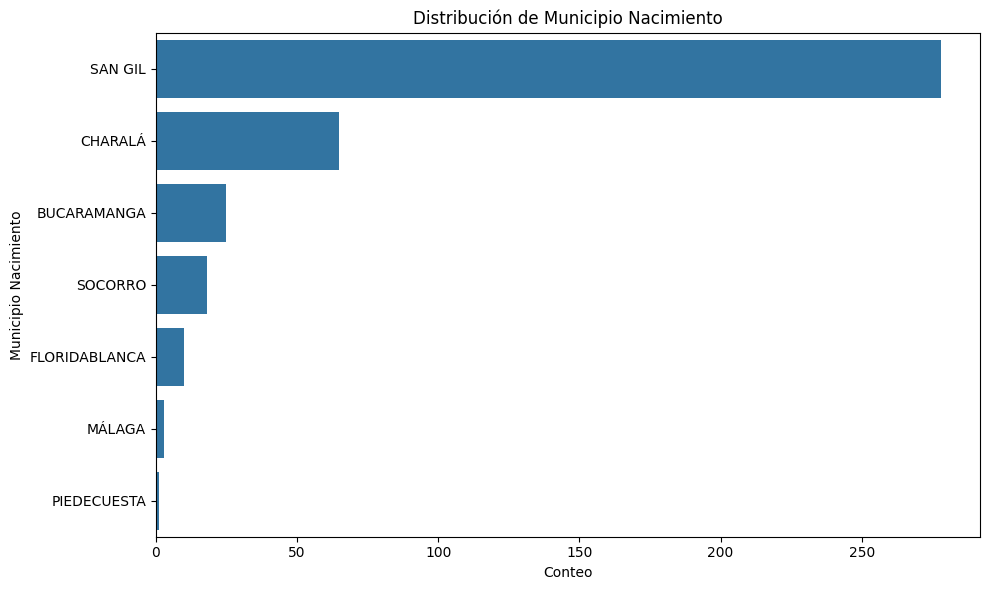

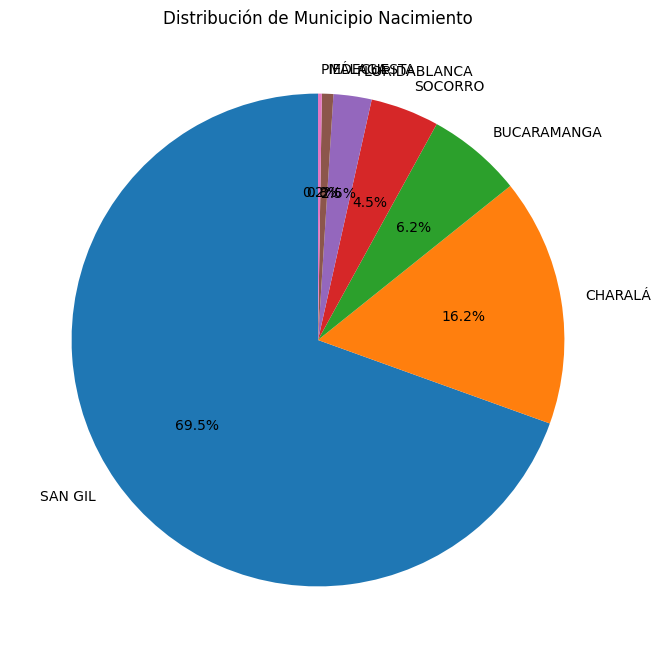

Generando gráficos para la columna: Sexo


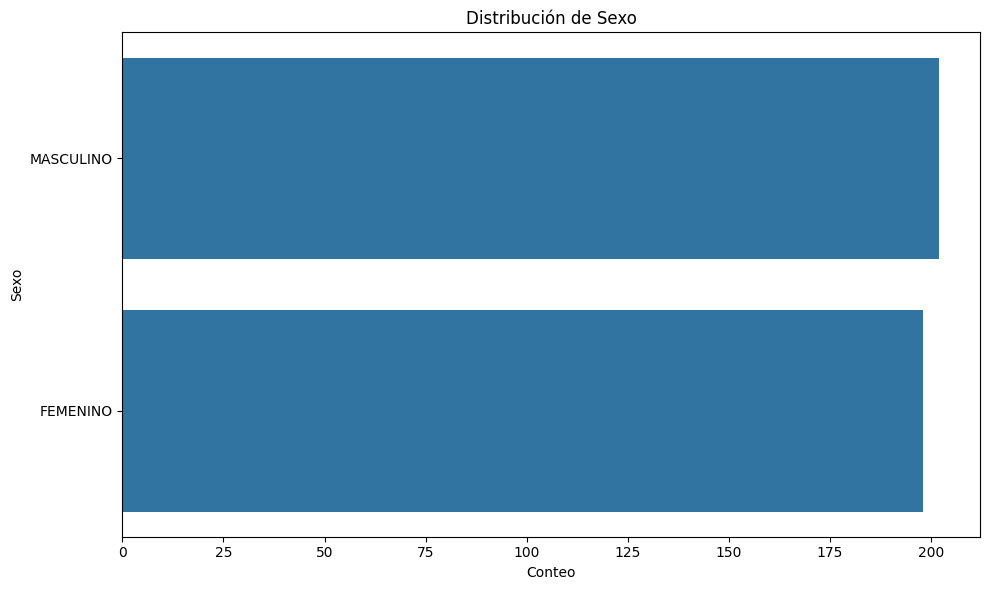

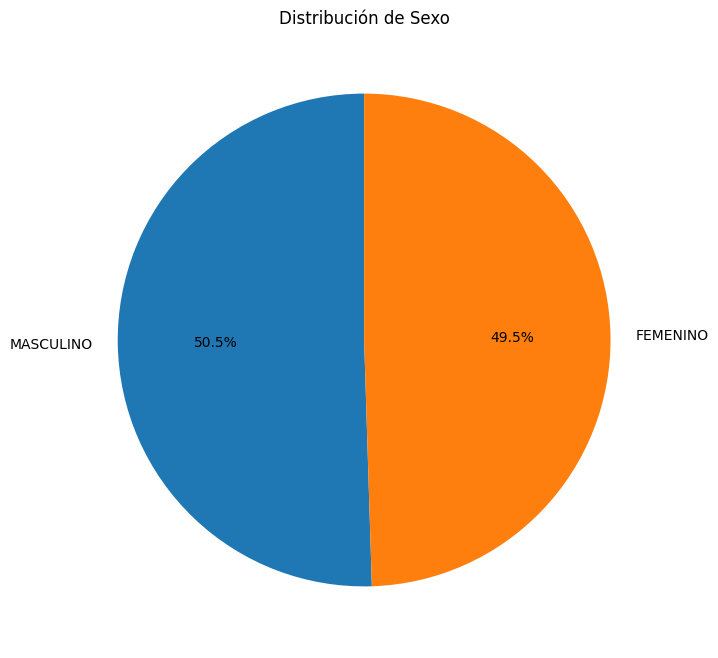

La columna 'Peso' no es categórica, no se generarán gráficos de torta o barras.
La columna 'Talla' no es categórica, no se generarán gráficos de torta o barras.
La columna 'Tiempo Gestación' no es categórica, no se generarán gráficos de torta o barras.


In [ ]:
# Generar diagramas para cada columna en df_columnas si es categórica
for col in df_columnas:
    if df_filtrado[col].dtype == 'object': # Verificar si la columna es categórica
        print(f"Generando gráficos para la columna: {col}")

        # Diagrama de barras
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_filtrado, y=col, order=df_filtrado[col].value_counts().index)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Conteo')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

        # Diagrama de torta (solo si el número de categorías no es demasiado grande)
        if df_filtrado[col].nunique() <= 10: # Limitar a 10 categorías para diagramas de torta legibles
            plt.figure(figsize=(8, 8))
            df_filtrado[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
            plt.title(f'Distribución de {col}')
            plt.ylabel('') # Eliminar etiqueta del eje y en el diagrama de torta
            plt.show()
        else:
            print(f"No se genera diagrama de torta para '{col}' debido a la gran cantidad de categorías ({df_filtrado[col].nunique()}).")
    else:
        print(f"La columna '{col}' no es categórica, no se generarán gráficos de torta o barras.")

La columna 'Departamento Nacimiento' es categórica, no se generarán histogramas o diagramas de caja.
La columna 'Municipio Nacimiento' es categórica, no se generarán histogramas o diagramas de caja.
La columna 'Sexo' es categórica, no se generarán histogramas o diagramas de caja.
Generando gráficos para la columna: Peso


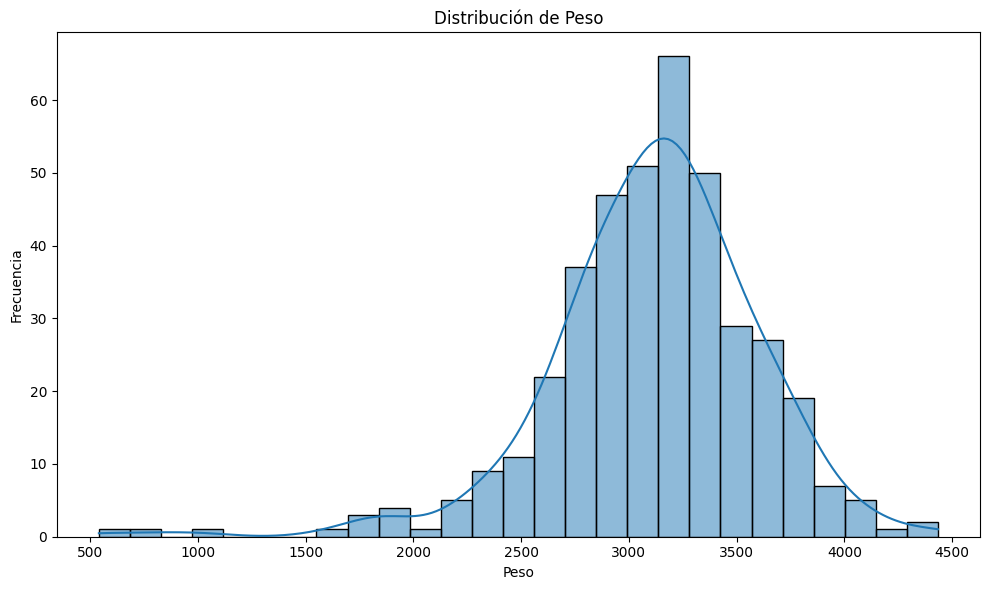

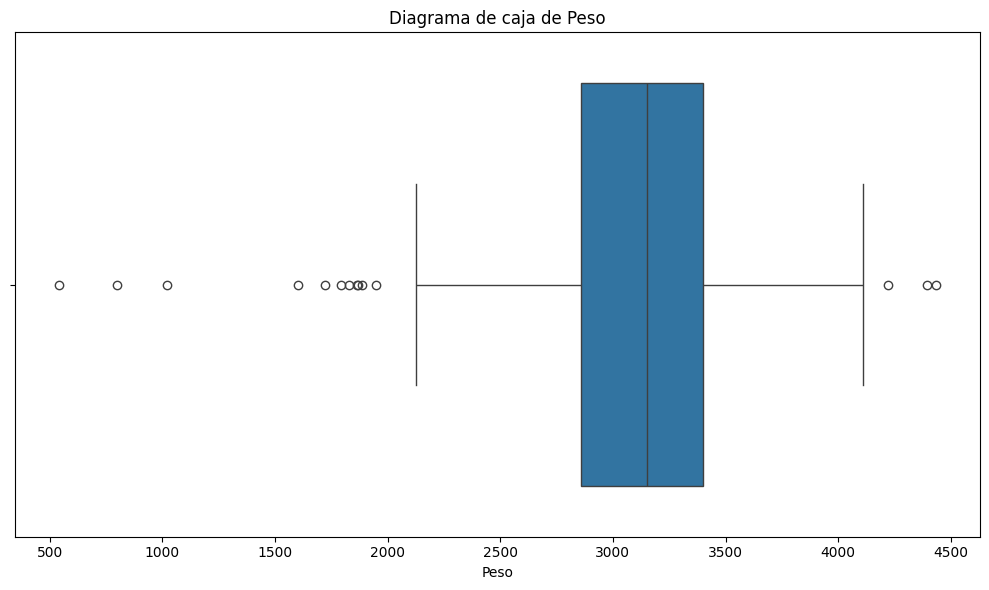

Generando gráficos para la columna: Talla


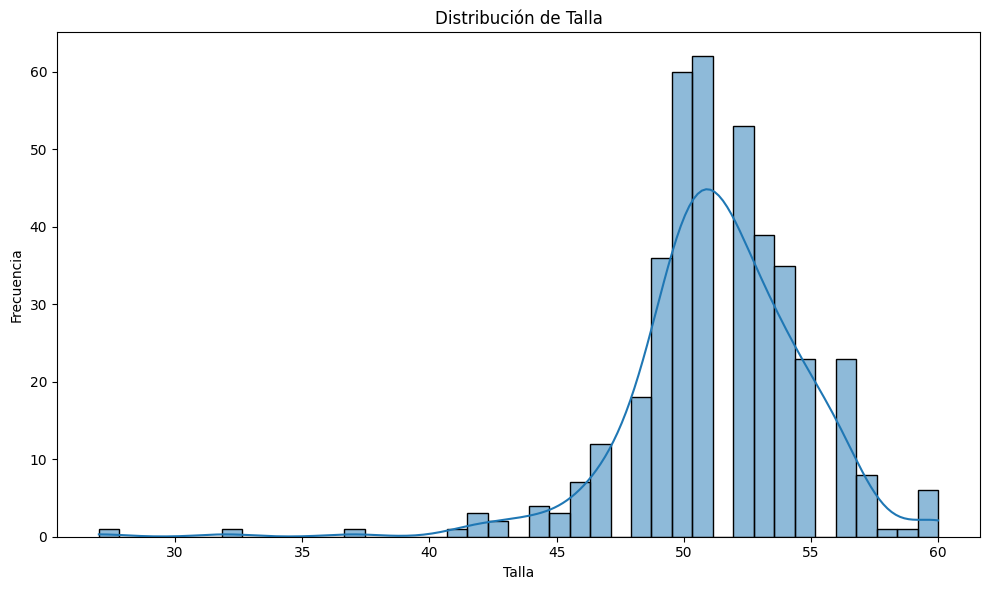

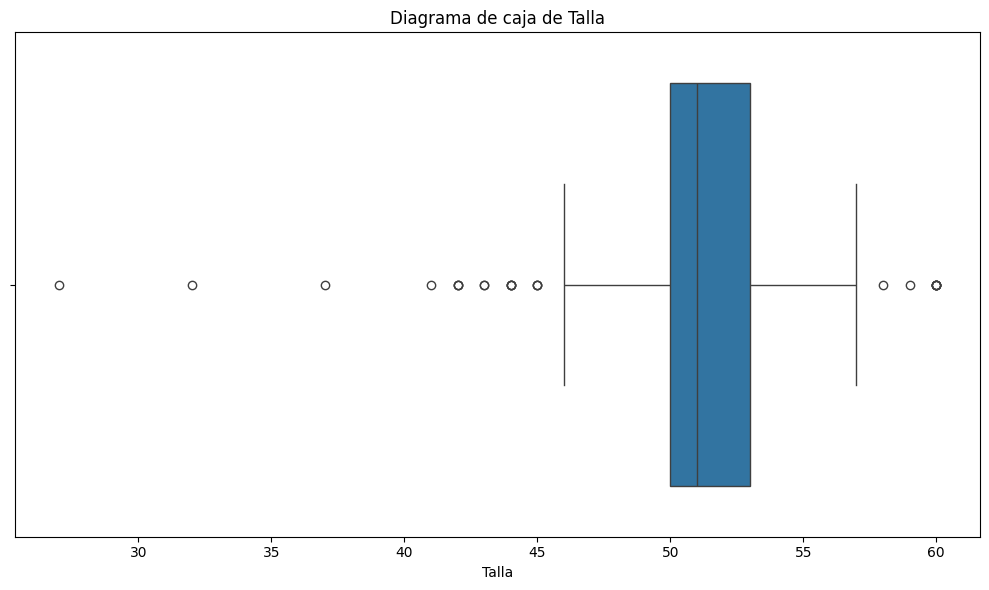

Generando gráficos para la columna: Tiempo Gestación


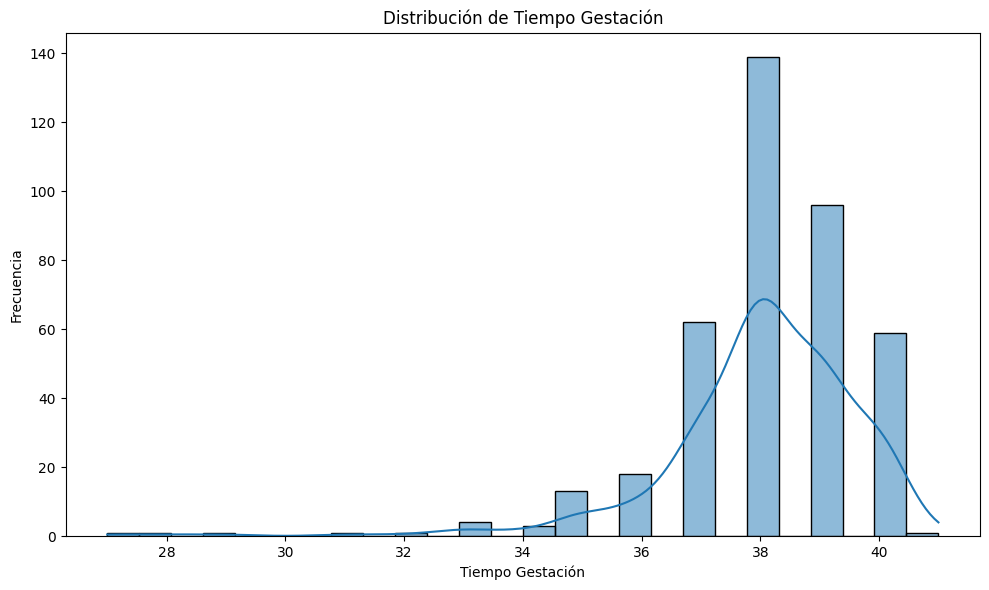

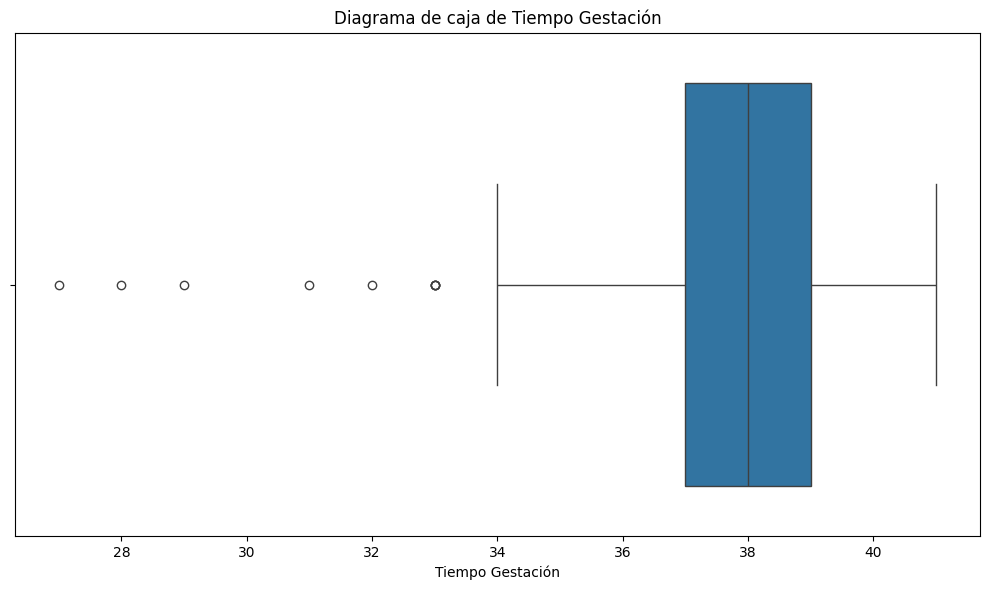

In [ ]:
# Generar histogramas y diagramas de caja para columnas numéricas en df_columnas
for col in df_columnas:
    if df_filtrado[col].dtype != 'object': # Verificar si la columna es numérica
        print(f"Generando gráficos para la columna: {col}")

        # Histograma
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_filtrado, x=col, kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

        # Diagrama de caja
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_filtrado, x=col)
        plt.title(f'Diagrama de caja de {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' es categórica, no se generarán histogramas o diagramas de caja.")

Procesando columna para eliminación de outliers: Peso
Procesando columna para eliminación de outliers: Talla
Procesando columna para eliminación de outliers: Tiempo Gestación

Número de filas después de eliminar outliers: 342
La columna 'Departamento Nacimiento' es categórica, no se generarán histogramas o diagramas de caja después de eliminar outliers.
La columna 'Municipio Nacimiento' es categórica, no se generarán histogramas o diagramas de caja después de eliminar outliers.
La columna 'Sexo' es categórica, no se generarán histogramas o diagramas de caja después de eliminar outliers.
Generando gráficos para la columna: Peso después de eliminar outliers


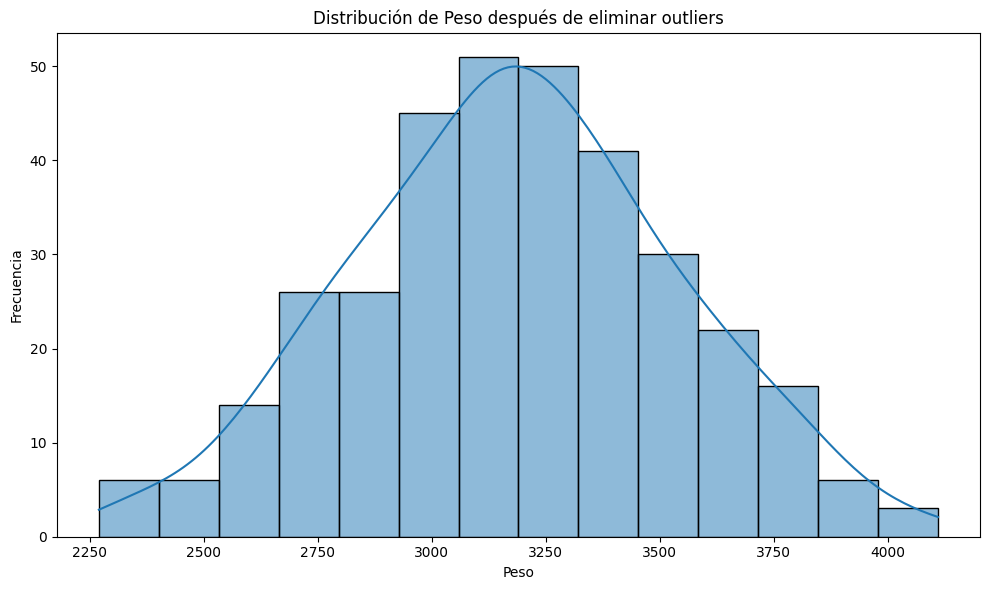

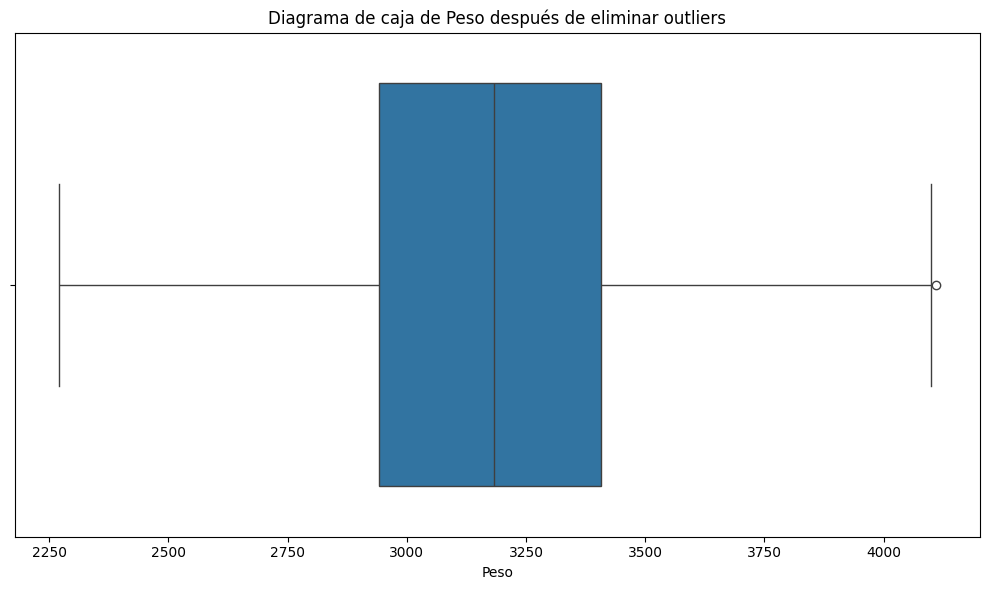

Generando gráficos para la columna: Talla después de eliminar outliers


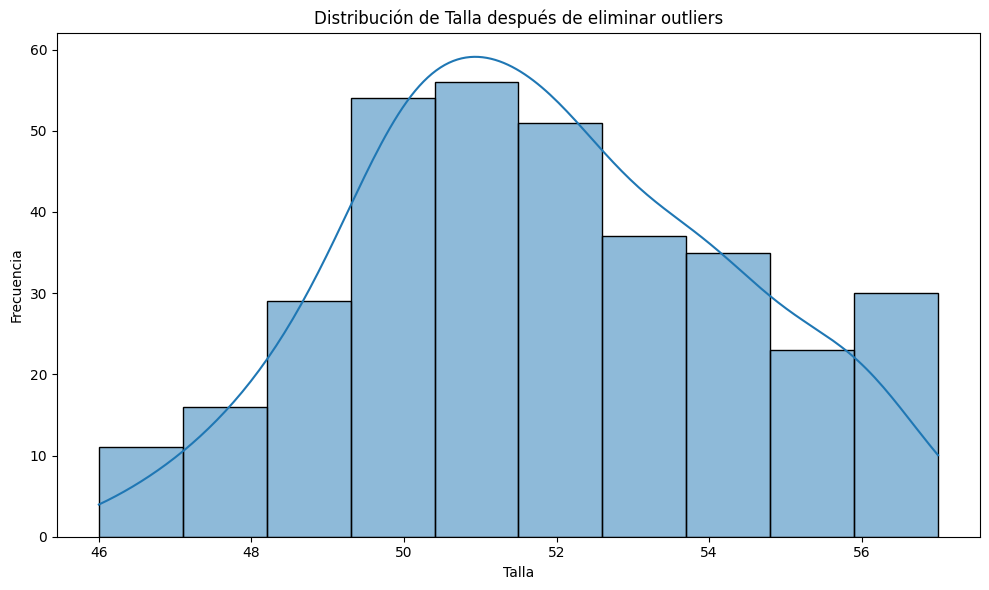

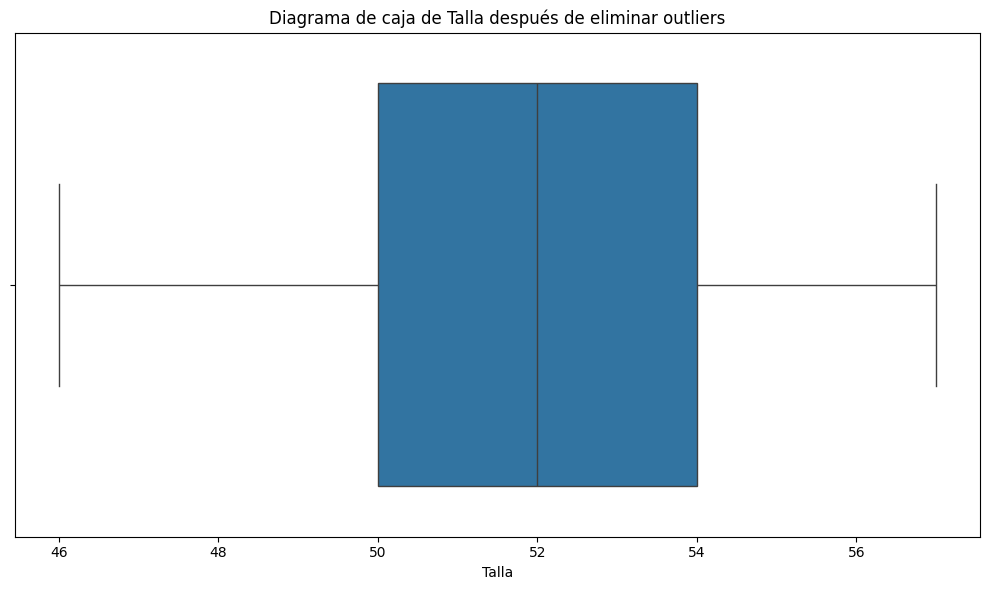

Generando gráficos para la columna: Tiempo Gestación después de eliminar outliers


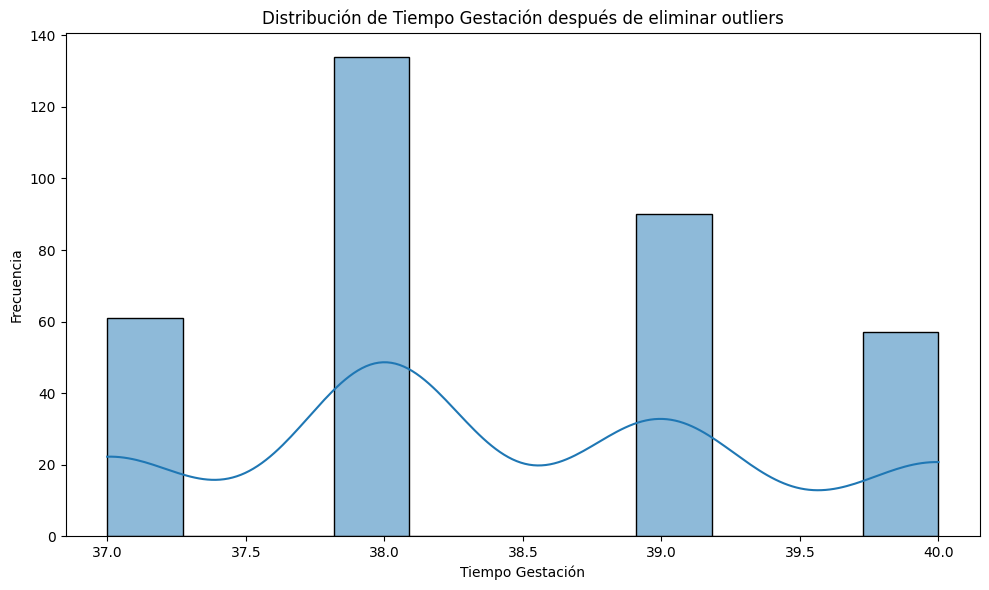

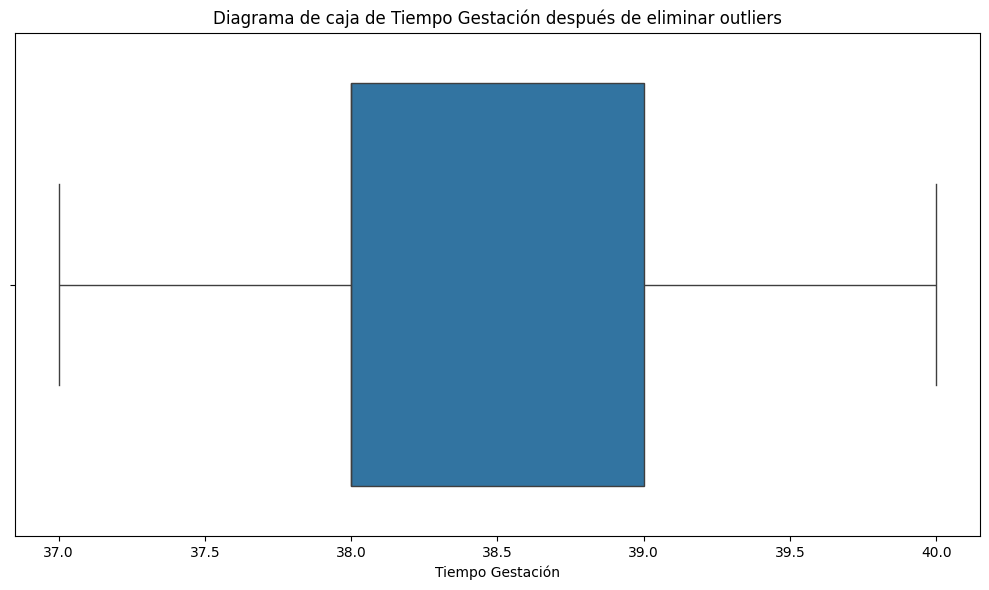

In [ ]:
# Eliminar datos atípicos usando el método IQR para columnas numéricas en df_columnas
df_cleaned = df_filtrado.copy() # Crear una copia para no modificar el DataFrame original

for col in df_columnas:
    if df_cleaned[col].dtype != 'object': # Verificar si la columna es numérica
        print(f"Procesando columna para eliminación de outliers: {col}")

        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar filas que no son outliers
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"\nNúmero de filas después de eliminar outliers: {df_cleaned.shape[0]}")

# Generar histogramas y diagramas de caja para columnas numéricas en df_columnas después de eliminar outliers
for col in df_columnas:
    if df_cleaned[col].dtype != 'object':
        print(f"Generando gráficos para la columna: {col} después de eliminar outliers")

        # Histograma
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df_cleaned, x=col, kde=True)
        plt.title(f'Distribución de {col} después de eliminar outliers')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

        # Diagrama de caja
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_cleaned, x=col)
        plt.title(f'Diagrama de caja de {col} después de eliminar outliers')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"La columna '{col}' es categórica, no se generarán histogramas o diagramas de caja después de eliminar outliers.")


La columna 'Departamento Nacimiento' es categórica, no se realizarán tests de normalidad ni gráficos QQ.

La columna 'Municipio Nacimiento' es categórica, no se realizarán tests de normalidad ni gráficos QQ.

La columna 'Sexo' es categórica, no se realizarán tests de normalidad ni gráficos QQ.

Realizando tests de normalidad para la columna: Peso
Shapiro-Wilk test: Statistic=0.9970, p-value=0.7750
Kolmogorov-Smirnov test (normal): Statistic=0.0252, p-value=0.9084
Anderson-Darling test (normal): Statistic=0.1695
   Significance level 15.0%: 0.5690
   Significance level 10.0%: 0.6490
   Significance level 5.0%: 0.7780
   Significance level 2.5%: 0.9080
   Significance level 1.0%: 1.0800
Jarque-Bera test: Statistic=0.9301, p-value=0.6281


<Figure size 800x600 with 0 Axes>

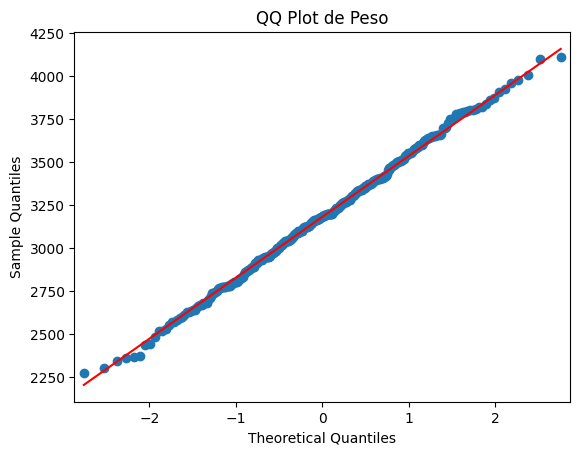


Realizando tests de normalidad para la columna: Talla
Shapiro-Wilk test: Statistic=0.9742, p-value=0.0000
Kolmogorov-Smirnov test (normal): Statistic=0.1138, p-value=0.0010
Anderson-Darling test (normal): Statistic=3.2911
   Significance level 15.0%: 0.5690
   Significance level 10.0%: 0.6490
   Significance level 5.0%: 0.7780
   Significance level 2.5%: 0.9080
   Significance level 1.0%: 1.0800
Jarque-Bera test: Statistic=5.1005, p-value=0.0781


<Figure size 800x600 with 0 Axes>

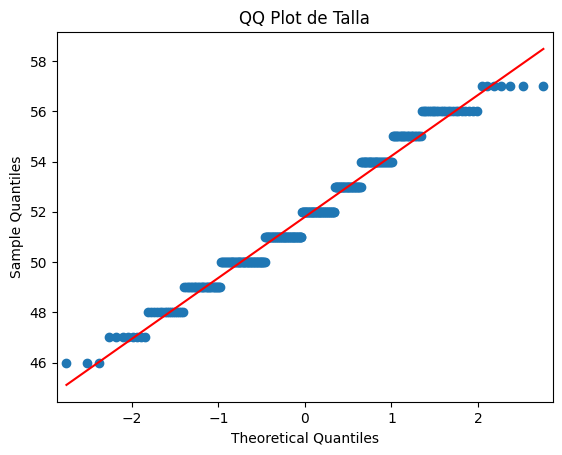


Realizando tests de normalidad para la columna: Tiempo Gestación
Shapiro-Wilk test: Statistic=0.8743, p-value=0.0000
Kolmogorov-Smirnov test (normal): Statistic=0.2374, p-value=0.0010
Anderson-Darling test (normal): Statistic=16.8588
   Significance level 15.0%: 0.5690
   Significance level 10.0%: 0.6490
   Significance level 5.0%: 0.7780
   Significance level 2.5%: 0.9080
   Significance level 1.0%: 1.0800
Jarque-Bera test: Statistic=14.3366, p-value=0.0008


<Figure size 800x600 with 0 Axes>

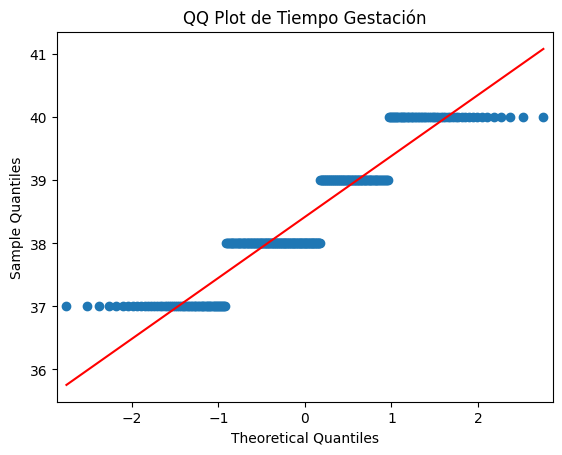

In [ ]:
from scipy import stats
import statsmodels.api as sm

# Realizar tests de normalidad y generar gráficos QQ para columnas numéricas en df_columnas
for col in df_columnas:
    if df_cleaned[col].dtype != 'object': # Verificar si la columna es numérica
        print(f"\nRealizando tests de normalidad para la columna: {col}")

        # Shapiro-Wilk test
        shapiro_test = stats.shapiro(df_cleaned[col])
        print(f"Shapiro-Wilk test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

        # Kolmogorov-Smirnov test (usando statsmodels para una implementación más robusta)
        # Nota: statsmodels.api.kstest requiere especificar la distribución, para normal se usa 'norm'
        ks_test = sm.stats.diagnostic.kstest_normal(df_cleaned[col])
        print(f"Kolmogorov-Smirnov test (normal): Statistic={ks_test[0]:.4f}, p-value={ks_test[1]:.4f}")


        # Anderson-Darling test
        anderson_test = stats.anderson(df_cleaned[col], dist='norm')
        print(f"Anderson-Darling test (normal): Statistic={anderson_test.statistic:.4f}")
        for i in range(len(anderson_test.critical_values)):
            sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
            print(f'   Significance level {sl}%: {cv:.4f}')

        # Jarque-Bera test
        jarque_bera_test = stats.jarque_bera(df_cleaned[col])
        print(f"Jarque-Bera test: Statistic={jarque_bera_test.statistic:.4f}, p-value={jarque_bera_test.pvalue:.4f}")

        # QQ Plot
        plt.figure(figsize=(8, 6))
        sm.qqplot(df_cleaned[col], line='s')
        plt.title(f'QQ Plot de {col}')
        plt.show()
    else:
        print(f"\nLa columna '{col}' es categórica, no se realizarán tests de normalidad ni gráficos QQ.")